In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype

def get_MA(df, window):
    '''Returns MA for numerical columns'''
    
    # Error check
    if type(df) != pd.DataFrame:
        raise TypeError('df must by type pandas.DataFrame')
    
    # Numerical column selection
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    num_df = df.select_dtypes(include=numerics)
    
    # Caching
    idx = num_df.index
    cols = num_df.columns.values.tolist()
    data = num_df.to_numpy().T
    
    # Define and run MA on data matrix
    def ma(array, w):
        return np.convolve(array, np.ones(w), 'valid') / w
    
    MAs = np.zeros((data.shape[0], data.shape[1]-window+1))
    for i, col in enumerate(data):
        MAs[i] = ma(col, window)
    
    # Col names generation
    for i, col in enumerate(cols):
        cols[i] = col + f'__{window}__mean'
    
    # Construct and return df of MAs
    ma_df = pd.DataFrame(MAs.T, columns = cols, index=idx[window-1:])
    return ma_df
    

### Plotting the 50 & 250 MA over actual data 
- some random data range to better see details is used
- we then confirm correct name of the columns in a new DF
- we also confirm there are no changes in original DF

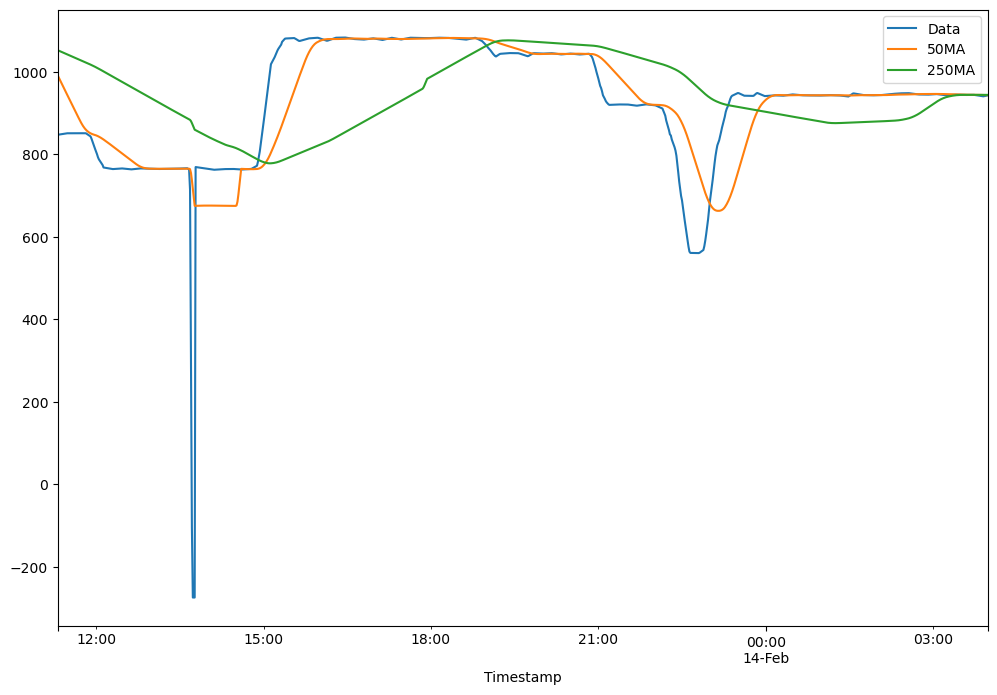

In [120]:
data = pd.read_csv('dataset_tidy.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.set_index('Timestamp')

data_original = data.copy()

data_MA50 = get_MA(data, 50)
data_MA250 = get_MA(data, 250)

data['power'][5000:6000].plot(figsize=(12, 8))
data_MA50['power__50__mean'][4950:5950].plot()
data_MA250['power__250__mean'][4750:5750].plot()
plt.legend(['Data', '50MA', '250MA'])
plt.show()

In [116]:
data_MA50.head()

,P1__50__mean,T1__50__mean,T2__50__mean,Ta1__50__mean,Ta3__50__mean,Ta4__50__mean,Ta5__50__mean,Ta6__50__mean,Ta7__50__mean,Ta8__50__mean,Ta_q__50__mean,power__50__mean
Timestamp,,,,,,,,,,,,
2004-02-10 00:49:00,-259.924044,606.382084,592.578205,206.609391,191.103817,213.061807,196.322067,217.358691,221.521791,222.302454,392.084146,-275.505519
2004-02-10 00:50:00,-259.750949,606.182066,592.433514,207.915762,192.696783,214.515445,197.668995,218.805949,222.992410,223.758956,392.149491,-275.505719
2004-02-10 00:51:00,-259.572908,605.986005,592.304648,209.248227,194.337426,215.991496,199.045025,220.281120,224.488865,225.239052,391.264341,-275.505763
2004-02-10 00:52:00,-259.389876,605.793900,592.191608,210.590181,196.053681,217.487819,200.440553,221.774642,226.003312,226.730621,390.944464,-275.505651
2004-02-10 00:53:00,-259.201648,605.605688,592.094331,211.963322,197.783130,219.006762,201.856686,223.285755,227.542729,228.245608,390.787953,-275.505384


In [127]:
(data == data_original).all()

P1       True
T1       True
T2       True
Ta1      True
Ta3      True
Ta4      True
Ta5      True
Ta6      True
Ta7      True
Ta8      True
Ta_q     True
v_1      True
power    True
dtype: bool

### All columns have correct name and original DF is not affected by function